In [1]:
# Importing Required Libraries

import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Initialize the training and validation generators

train_dir = 'data/train'
test_dir = 'data/test'
train_datagenerator = ImageDataGenerator(rescale=1./255)
test_datagenerator = ImageDataGenerator(rescale=1./255)

train_generator = train_datagenerator.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

test_generator = test_datagenerator.flow_from_directory(
        test_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [3]:
# Building the CNN architecture
# with four conv2D layers, two dense layers and one flatten layer

recognition_model = Sequential()

recognition_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
recognition_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
recognition_model.add(MaxPooling2D(pool_size=(2, 2)))
recognition_model.add(Dropout(0.25))

recognition_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
recognition_model.add(MaxPooling2D(pool_size=(2, 2)))
recognition_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
recognition_model.add(MaxPooling2D(pool_size=(2, 2)))
recognition_model.add(Dropout(0.25))

recognition_model.add(Flatten())
recognition_model.add(Dense(1024, activation='relu'))
recognition_model.add(Dropout(0.5))
recognition_model.add(Dense(7, activation='softmax'))

In [4]:
# Getting Model Summary

recognition_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 22, 22, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 128)       0         
 g2D)                                                   

In [5]:
# Disable OpenCL

cv2.ocl.setUseOpenCL(False)

In [6]:
import tensorflow as tf

optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001, decay=1e-6)


In [7]:
import tensorflow as tf

# Define your model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Define your optimizer with learning rate and learning rate decay
initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.96,
    staircase=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# Compile the model
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [10]:
# Compile Model

recognition_model.compile(loss='categorical_crossentropy',optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001, decay=1e-6),metrics=['accuracy'])

In [11]:
# Train the model

recognition_model_info = recognition_model.fit(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=60,
        validation_data=test_generator,
        validation_steps=7178 // 64)

Epoch 1/60


448/448 [==============================] - 171s 375ms/step - loss: 1.7156 - accuracy: 0.3049 - val_loss: 1.5078 - val_accuracy: 0.4240
Epoch 2/60
448/448 [==============================] - 167s 372ms/step - loss: 1.4214 - accuracy: 0.4509 - val_loss: 1.3046 - val_accuracy: 0.4927
Epoch 3/60
448/448 [==============================] - 158s 352ms/step - loss: 1.2703 - accuracy: 0.5138 - val_loss: 1.1921 - val_accuracy: 0.5428
Epoch 4/60
448/448 [==============================] - 158s 352ms/step - loss: 1.1866 - accuracy: 0.5501 - val_loss: 1.1492 - val_accuracy: 0.5654
Epoch 5/60
448/448 [==============================] - 159s 354ms/step - loss: 1.1262 - accuracy: 0.5710 - val_loss: 1.1149 - val_accuracy: 0.5797
Epoch 6/60
448/448 [==============================] - 163s 364ms/step - loss: 1.0678 - accuracy: 0.5971 - val_loss: 1.0970 - val_accuracy: 0.5799
Epoch 7/60
448/448 [==============================] - 158s 352ms/step - loss: 1.0261 - accuracy: 0.6127 - val_loss: 1.0755

Epoch 54/60
448/448 [==============================] - 93s 208ms/step - loss: 0.3205 - accuracy: 0.8892 - val_loss: 1.3339 - val_accuracy: 0.6336
Epoch 55/60
448/448 [==============================] - 93s 208ms/step - loss: 0.3139 - accuracy: 0.8891 - val_loss: 1.3310 - val_accuracy: 0.6314
Epoch 56/60
448/448 [==============================] - 93s 208ms/step - loss: 0.3046 - accuracy: 0.8945 - val_loss: 1.3687 - val_accuracy: 0.6267
Epoch 57/60
448/448 [==============================] - 105s 235ms/step - loss: 0.3102 - accuracy: 0.8924 - val_loss: 1.3355 - val_accuracy: 0.6253
Epoch 58/60
448/448 [==============================] - 95s 213ms/step - loss: 0.2953 - accuracy: 0.8943 - val_loss: 1.3260 - val_accuracy: 0.6257
Epoch 59/60
448/448 [==============================] - 92s 206ms/step - loss: 0.3060 - accuracy: 0.8923 - val_loss: 1.3509 - val_accuracy: 0.6370
Epoch 60/60
448/448 [==============================] - 93s 207ms/step - loss: 0.2975 - accuracy: 0.8971 - val_loss: 1.3596 

In [12]:
# Saving the trained Model Weights

recognition_model.save_weights('recognition_model.h5')

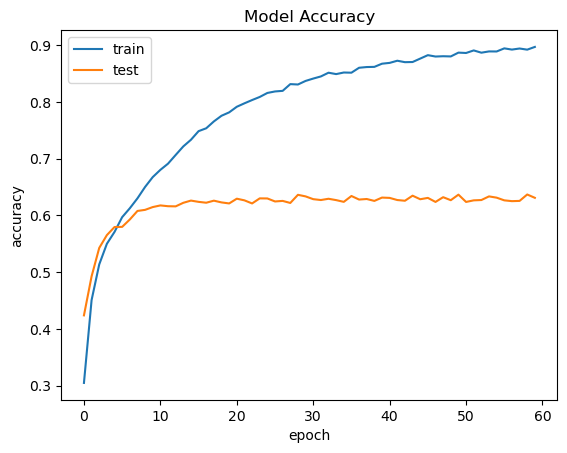

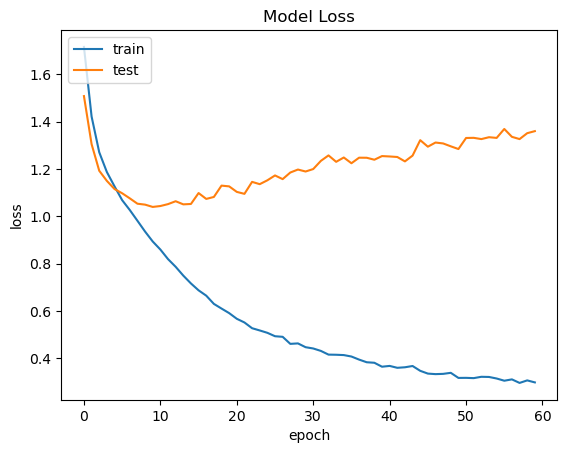

In [13]:
# Summarize history for accuracy

plt.title('Model Accuracy')
plt.plot(recognition_model_info.history['accuracy'])
plt.plot(recognition_model_info.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Summarize history for loss

plt.title('Model Loss')
plt.plot(recognition_model_info.history['loss'])
plt.plot(recognition_model_info.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
# Facial emotion Dictonary with values

facial_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

In [15]:
# Start the webcam feed

cap = cv2.VideoCapture(0)
while True:
    # Find haar cascade to draw bounding box around face
    ret, frame = cap.read()
    if not ret:
        break
    bounding_box = cv2.CascadeClassifier('haarcascades_cuda/haarcascade_frontalface_default.xml')
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    num_faces = bounding_box.detectMultiScale(gray_frame,scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in num_faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (255, 0, 0), 2)
        roi_gray_frame = gray_frame[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)
        facial_prediction = recognition_model.predict(cropped_img)
        maxindex = int(np.argmax(facial_prediction))
        cv2.putText(frame, facial_dict[maxindex], (x+20, y-60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    cv2.imshow('Video', cv2.resize(frame,(1200,860),interpolation = cv2.INTER_CUBIC))
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()